In [2]:
# import_notebooks is a custom python script
# this line makes it possible to import functions from other IPython notebooks
from import_notebooks import *

In [3]:
# Here we import all the functions (*) from these notebooks
from Hainan_Data_Cleaning import *
from time_shift_dataframe import *
from Stratified_Split import *
from Cumulative import *
from Rollingsum import *
from LR_model import *
from Classification_Functions import *
# from nn_model_keras import *

from Utilities import *

importing Jupyter notebook from Hainan_Data_Cleaning.ipynb
importing Jupyter notebook from time_shift_dataframe.ipynb
importing Jupyter notebook from Stratified_Split.ipynb
importing Jupyter notebook from Cumulative.ipynb
importing Jupyter notebook from Rollingsum.ipynb
importing Jupyter notebook from LR_model.ipynb


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


importing Jupyter notebook from Classification_Functions.ipynb
importing Jupyter notebook from Utilities.ipynb


In [4]:
# load_hainan_data() is from Hainan_Data_Cleaning and it loads hainan data
df = load_hainan_data()
shift= 15
df_ts = timeshift_df(df, shift)

df_ts.columns.values
df_ts_relfeatures = df_ts.drop(['Year', 'Month', 'Day','BioCNG', 'LiquidFertilizer',
       'SolidFertilizer', 'WasteWater', 'SolidResidues','ProjectElectricity',
       'OfficeElectricity', 'Water', 'Diesel'], axis=1)

print(df_ts_relfeatures.shape[0])
df_ts_relfeatures = df_ts_relfeatures.apply(pd.to_numeric, errors='coerce')
df_ts_relfeatures = df_ts_relfeatures.dropna()
print(df_ts_relfeatures.shape[0])

roll = 39
roll_df = rollingsum(df_ts_relfeatures, roll)
print(roll_df.shape[0])
df_ts_relfeatures.head()

1413
1413
1374


,RawBiogas,PigManure,Cassava,FishWastewater,KitchenFoodWaste,MunicipalFecalWaste,TeaWaste,ChickenWaste,Bagasse,AlcoholWaste,ChineseMedicineWaste,EnergyGrass,BananaFruitShafts,LemonWaste,Percolate,Other,NaOH,FeCl2,PAM,Defoamer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,14.9,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# FEATURE ENGINEERING GOES HERE

# roll_df.head()

pigsum = sum(roll_df.PigManure)
print("Pig Manure Sum:", pigsum)
cassavasum = sum(roll_df.Cassava)
print("Cassava Sum:", cassavasum)
fishsum = sum(roll_df.FishWastewater)
print("Fish Wastewater Sum:", fishsum)
kitchensum = sum(roll_df.KitchenFoodWaste)
print("Kitchen Food Waste Sum:", kitchensum)
mfwsum = sum(roll_df.MunicipalFecalWaste)
print("Municipal Fecal Waste Sum:", mfwsum)
teasum = sum(roll_df.TeaWaste)
print("Tea Waste Sum:", teasum)
chickensum = sum(roll_df.ChickenWaste)
print("Chicken Waste Sum:", chickensum)
bagsum = sum(roll_df.Bagasse)
print("Bagasse Sum:", bagsum)
alcsum = sum(roll_df.AlcoholWaste)
print("Alcohol Waste Sum:", alcsum)
cmwsum = sum(roll_df.ChineseMedicineWaste)
print("Chinese Medicine Waste Sum:", cmwsum)
grasssum = sum(roll_df.EnergyGrass)
print("Energy Grass Sum:", grasssum)
bfssum = sum(roll_df.BananaFruitShafts)
print("Banana Fruit Shafts Sum:", bfssum)
lwsum = sum(roll_df.LemonWaste)
print("Lemon Waste Sum:", lwsum)
percsum = sum(roll_df.Percolate)
print("Percolate Sum:", percsum)
othersum = sum(roll_df.Other)
print("Other Sum:", othersum)
naohsum = sum(roll_df.NaOH)
print("NaOH Sum:", naohsum)
fecl2sum = sum(roll_df.FeCl2)
print("FeCl2 Sum:", fecl2sum)
pamsum = sum(roll_df.PAM)
print("PAM Sum:", pamsum)
defoamersum = sum(roll_df.Defoamer)
print("Defoamer Sum:", defoamersum)

Pig Manure Sum: 934521.119
Cassava Sum: 490357.14
Fish Wastewater Sum: 110973.32
Kitchen Food Waste Sum: 749775.87
Municipal Fecal Waste Sum: 1364037.438
Tea Waste Sum: 45081.36
Chicken Waste Sum: 301504.06
Bagasse Sum: 662474.276
Alcohol Waste Sum: 35796.54
Chinese Medicine Waste Sum: 11399.31
Energy Grass Sum: 3633.24
Banana Fruit Shafts Sum: 26137.8
Lemon Waste Sum: 17693.34
Percolate Sum: 4129096.3
Other Sum: 146562.52
NaOH Sum: 7287900.0809
FeCl2 Sum: 916110.0
PAM Sum: 81900.0
Defoamer Sum: 838.5


In [6]:
roll_df['Sum1'] = roll_df.ChineseMedicineWaste + roll_df.AlcoholWaste + roll_df.EnergyGrass + roll_df.BananaFruitShafts + roll_df.LemonWaste
roll_df['Sum2'] = roll_df.FishWastewater + roll_df.TeaWaste + roll_df.ChickenWaste
roll_df['Sum3'] = roll_df.PAM + roll_df.Defoamer + roll_df.Other

In [7]:
df_final = roll_df.drop(['ChineseMedicineWaste', 'AlcoholWaste', 'EnergyGrass','BananaFruitShafts', 'LemonWaste',
       'FishWastewater', 'TeaWaste', 'ChickenWaste','PAM',
       'Defoamer', 'Other'], axis=1)

In [32]:
df_final.head()

,RawBiogas,PigManure,Cassava,KitchenFoodWaste,MunicipalFecalWaste,Bagasse,Percolate,NaOH,FeCl2,Sum1,Sum2,Sum3
0,141091.0,7051.59,0.0,0.0,0.0,315.07,0.0,5184.8,0.0,0.0,0.0,267.78
1,144821.0,7058.59,0.0,0.0,0.0,330.07,0.0,5184.8,0.0,0.0,0.0,267.78
2,150021.0,7062.44,0.0,0.0,0.0,334.57,0.0,5184.8,0.0,0.0,0.0,267.78
3,154783.0,7069.96,0.0,0.0,0.0,339.57,0.0,5184.8,0.0,0.0,0.0,267.78
4,154783.0,7055.06,0.0,0.0,0.0,344.07,0.0,5184.8,0.0,0.0,0.0,267.78


In [43]:
models = []
mean_predictions = []
midpoint_predictions = []
for i in np.arange(0,46):
    bin_means = []
    bin_midpoints = []
    buckets=i+5
    x_train_c, y_train_c, x_test_c, y_test_c, bins_c = test_train_for_classification(df_final, num_buckets = buckets)
    flat_bins = bins_c/roll
    rf = RandomForest(x_train_c, y_train_c, x_test_c, y_test_c)
    models.append(rf[0])
    #print(rf[1])
    
    output_var = "RawBiogas"
    x_final = df_final.drop([output_var], axis=1)
    y_final = df_final[output_var]/roll

    for j in np.arange(0,buckets):
        bin_midpoints.append((flat_bins[j] + flat_bins[j+1])/2)
        df_bin = df[(df['RawBiogas'] >= flat_bins[j]) & (df['RawBiogas'] <= flat_bins[j+1])]
        #print(df_bin['RawBiogas'].mean())
        bin_means.append(df_bin['RawBiogas'].mean())

    
    rf_predictions = rf[0].predict(x_final)
    rf_predictions_means = rf_predictions
    rf_predictions_midpoints = rf_predictions
    #print(bin_means)
    for k in np.arange(0, len(rf_predictions)):
        for l in np.arange(0,buckets):
            if rf_predictions[k] == l:
                rf_predictions_means[k] = bin_means[l]
                rf_predictions_midpoints[k] = bin_midpoints[l]
    
    #pred_shift = timeshift_df2(pd.DataFrame(rf_predictions), shift, index=1)
    #rf_predictions = pred_shift.values
    mean_predictions.append(rf_predictions_means)
    midpoint_predictions.append(rf_predictions_midpoints)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
print(predictions[95])

[ 3646  3777  3777 ..., 17701 17701 17701]


In [44]:
RMSE_array_means=[]
for m in np.arange(0,len(mean_predictions)):
    se = 0;
    for n in np.arange(0,len(mean_predictions[m])):
        se = se + (y_final[n] - mean_predictions[m][n])**2
    RMSE = (se/len(mean_predictions[m]))**0.5
    RMSE_array_means.append(RMSE)

In [45]:
RMSE_array_midpoints=[]
for m in np.arange(0,len(midpoint_predictions)):
    se = 0;
    for n in np.arange(0,len(midpoint_predictions[m])):
        se = se + (y_final[n] - midpoint_predictions[m][n])**2
    RMSE = (se/len(midpoint_predictions[m]))**0.5
    RMSE_array_midpoints.append(RMSE)

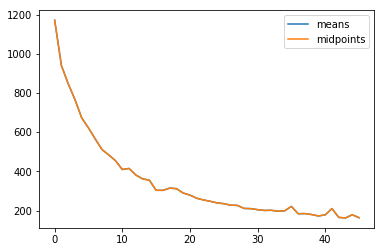

In [52]:
plt.plot(RMSE_array_means)
plt.plot(RMSE_array_midpoints)
plt.legend(labels=('means', 'midpoints'))

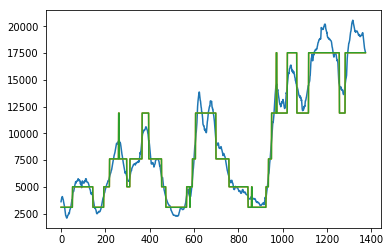

In [56]:
plt.plot(y_final);
plt.plot(midpoint_predictions[0]);
plt.plot(mean_predictions[0]);

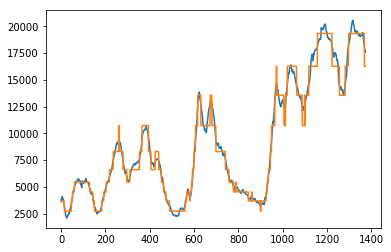

In [55]:
plt.plot(y_final);
plt.plot(predictions[5]);